# Bibliotecas

In [11]:
%matplotlib inline

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import kneighbors_graph

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Funções Auxiliares

# Carregando os Dados

In [12]:
df = pd.read_csv("./df_ex1.csv")

In [13]:
df.head()

,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,percentualRisco,ativoCirculante,passivoCirculante,totalAtivo,...,faturamentoBruto,margemBruta,custos,anoFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,kmeans
0,IYZA05872767332466,2,0.000000,0.0,0,0.0,0.283019,437853.0,272388.0,450614.0,...,624350.0,-3319.0,-431401.0,2008.0,40000.0,False,True,0.0,10800.0,1
1,MJEK50274612793018,7,0.387733,0.0,63,10368.0,0.283019,382348.0,890140.0,627034.0,...,1177807.0,0.0,0.0,2012.0,50000.0,False,True,1.0,44000.0,4
2,FECA48063802482890,19,0.000000,0.0,0,0.0,0.320755,714851.0,188269.0,728846.0,...,1249651.0,302367.0,2183996.0,2008.0,100000.0,False,True,0.0,165850.0,1
3,PMQC81082938911940,28,0.000000,0.0,0,0.0,0.358491,95762.0,293393.0,4786692.0,...,5368371.0,1346068.0,2072196.0,2012.0,500000.0,False,True,0.0,194114.0,1
4,OGWM99265986867408,0,0.385918,0.0,0,0.0,0.283019,911113.0,509051.0,926368.0,...,572776.0,0.0,0.0,2014.0,80000.0,False,True,1.0,63000.0,4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cnpjSemTraco                 1523 non-null   object 
 1   maiorAtraso                  1523 non-null   int64  
 2   margemBrutaAcumulada         1523 non-null   float64
 3   percentualProtestos          1523 non-null   float64
 4   prazoMedioRecebimentoVendas  1523 non-null   int64  
 5   titulosEmAberto              1523 non-null   float64
 6   percentualRisco              1523 non-null   float64
 7   ativoCirculante              1523 non-null   float64
 8   passivoCirculante            1523 non-null   float64
 9   totalAtivo                   1523 non-null   float64
 10  totalPatrimonioLiquido       1523 non-null   float64
 11  endividamento                1523 non-null   float64
 12  duplicatasAReceber           1523 non-null   float64
 13  estoque           

In [15]:
x = df.drop(['cnpjSemTraco', 'kmeans'], axis=1)
y = df.kmeans

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [17]:
dtf = DecisionTreeClassifier(random_state=42)
clf_tree = dtf.fit(x_train, y_train)

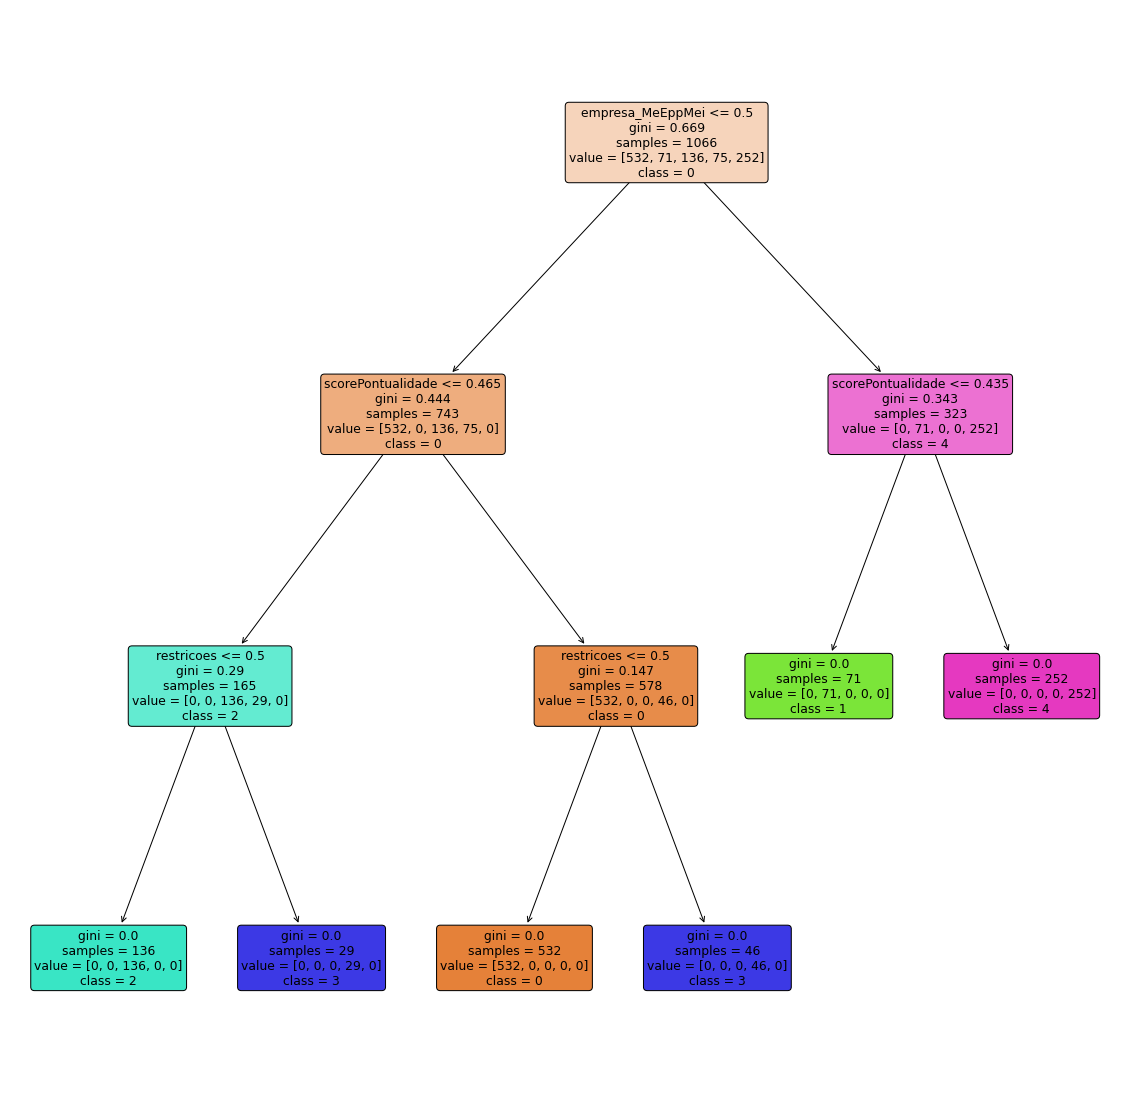

In [20]:
fig = plt.figure(figsize=(20,20))
tree = plot_tree(clf_tree, feature_names=x_train.columns, rounded=True, class_names=['0', '1', '2', '3', '4'], filled=True)

In [21]:
clf_tree.score(x_test, y_test)

0.9978118161925602

In [89]:
df_teste = pd.read_csv("./df_pre_processado.csv")

df_teste.shape

(6012, 38)

In [90]:
df_teste.drop(['cnpjSemTraco', 'valorAprovado', 'valorSolicitado', 'dataAprovadoEmComite', 'dataAprovadoNivelAnalista', 'numero_solicitacao',
         'razaoSocial', 'nomeFantasia', 'status', 'definicaoRisco', 'diferencaPercentualRisco', 'dashboardCorrelacao',
         'periodoBalanco', 'primeiraCompra', 'intervaloFundacao', 'periodoDemonstrativoEmMeses'], axis=1, inplace=True)

In [120]:
numero = np.random.random_integers(df_teste.shape[0])
amostra = df_teste.iloc[numero,:]
amostra


maiorAtraso                            62
margemBrutaAcumulada             0.356487
percentualProtestos                   0.0
prazoMedioRecebimentoVendas            11
titulosEmAberto                    3960.0
percentualRisco                       0.0
ativoCirculante                11074062.0
passivoCirculante               4809299.0
totalAtivo                     11288225.0
totalPatrimonioLiquido          6075346.0
endividamento                    372000.0
duplicatasAReceber              8102520.0
estoque                         1251480.0
faturamentoBruto               10598406.0
margemBruta                     5867006.0
custos                          4731400.0
anoFundacao                        2009.0
capitalSocial                    150000.0
restricoes                          False
empresa_MeEppMei                     True
scorePontualidade                     1.0
limiteEmpresaAnaliseCredito      236042.0
Name: 1895, dtype: object

In [127]:
df_k = df[df.kmeans == 0]
numero = np.random.random_integers(df_k.shape[0])
amostra = df_k.iloc[numero, 1:-1]
amostra

maiorAtraso                            0
margemBrutaAcumulada            0.344353
percentualProtestos                  0.0
prazoMedioRecebimentoVendas            0
titulosEmAberto                      0.0
percentualRisco                 0.214286
ativoCirculante                1006307.0
passivoCirculante                53496.0
totalAtivo                     1006307.0
totalPatrimonioLiquido          952811.0
endividamento                        0.0
duplicatasAReceber                   0.0
estoque                              0.0
faturamentoBruto                402858.0
margemBruta                          0.0
custos                               0.0
anoFundacao                       2016.0
capitalSocial                   100000.0
restricoes                         False
empresa_MeEppMei                   False
scorePontualidade                    1.0
limiteEmpresaAnaliseCredito       7040.0
Name: 433, dtype: object

In [128]:
amostra = np.array(amostra).reshape(1,-1)
print(clf_tree.predict(amostra))

[0]


In [135]:
df_k = df[df.kmeans == 1]
numero = np.random.random_integers(df_k.shape[0])
amostra = df_k.iloc[numero, 1:-1]
amostra

maiorAtraso                            3
margemBrutaAcumulada                 0.0
percentualProtestos                  0.0
prazoMedioRecebimentoVendas            0
titulosEmAberto                      0.0
percentualRisco                 0.196429
ativoCirculante                      0.0
passivoCirculante                    0.0
totalAtivo                           0.0
totalPatrimonioLiquido               0.0
endividamento                        0.0
duplicatasAReceber                   0.0
estoque                              0.0
faturamentoBruto               3222059.0
margemBruta                          0.0
custos                               0.0
anoFundacao                       2014.0
capitalSocial                   200000.0
restricoes                         False
empresa_MeEppMei                    True
scorePontualidade                    0.0
limiteEmpresaAnaliseCredito      14580.0
Name: 832, dtype: object

In [136]:
amostra = np.array(amostra).reshape(1,-1)
print(clf_tree.predict(amostra))

[1]


In [137]:
df_k = df[df.kmeans == 2]
numero = np.random.random_integers(df_k.shape[0])
amostra = df_k.iloc[numero, 1:-1]
amostra

maiorAtraso                            0
margemBrutaAcumulada                 0.0
percentualProtestos                  0.0
prazoMedioRecebimentoVendas            0
titulosEmAberto                      0.0
percentualRisco                 0.142857
ativoCirculante                      0.0
passivoCirculante                    0.0
totalAtivo                           0.0
totalPatrimonioLiquido               0.0
endividamento                        0.0
duplicatasAReceber                   0.0
estoque                              0.0
faturamentoBruto               2242328.0
margemBruta                          0.0
custos                               0.0
anoFundacao                       2006.0
capitalSocial                    10000.0
restricoes                         False
empresa_MeEppMei                   False
scorePontualidade                    0.0
limiteEmpresaAnaliseCredito      37800.0
Name: 222, dtype: object

In [138]:
amostra = np.array(amostra).reshape(1,-1)
print(clf_tree.predict(amostra))

[2]


In [139]:
df_k = df[df.kmeans == 3]
numero = np.random.random_integers(df_k.shape[0])
amostra = df_k.iloc[numero, 1:-1]
amostra

maiorAtraso                              0
margemBrutaAcumulada                   0.0
percentualProtestos                    0.0
prazoMedioRecebimentoVendas              0
titulosEmAberto                        0.0
percentualRisco                   0.142857
ativoCirculante                123652545.0
passivoCirculante               92788588.0
totalAtivo                     148154853.0
totalPatrimonioLiquido          26202813.0
endividamento                          0.0
duplicatasAReceber              66497451.0
estoque                                0.0
faturamentoBruto               201782206.0
margemBruta                    127421003.0
custos                          74361203.0
anoFundacao                         1973.0
capitalSocial                    1156103.0
restricoes                            True
empresa_MeEppMei                     False
scorePontualidade                      0.0
limiteEmpresaAnaliseCredito     10082143.0
Name: 1479, dtype: object

In [140]:
amostra = np.array(amostra).reshape(1,-1)
print(clf_tree.predict(amostra))

[3]


In [141]:
df_k = df[df.kmeans == 4]
numero = np.random.random_integers(df_k.shape[0])
amostra = df_k.iloc[numero, 1:-1]
amostra

maiorAtraso                           62
margemBrutaAcumulada            0.618928
percentualProtestos                  0.0
prazoMedioRecebimentoVendas           80
titulosEmAberto                 34503.01
percentualRisco                 0.232143
ativoCirculante                8728100.0
passivoCirculante                62975.0
totalAtivo                     8727758.0
totalPatrimonioLiquido         6268227.0
endividamento                        0.0
duplicatasAReceber                   0.0
estoque                        3406376.0
faturamentoBruto               2448370.0
margemBruta                    2444740.0
custos                            3630.0
anoFundacao                       2012.0
capitalSocial                   300000.0
restricoes                         False
empresa_MeEppMei                    True
scorePontualidade               0.846469
limiteEmpresaAnaliseCredito        720.0
Name: 1192, dtype: object

In [142]:
amostra = np.array(amostra).reshape(1,-1)
print(clf_tree.predict(amostra))

[4]
